<a href="https://colab.research.google.com/github/sren97/Modelos2_PhiUSIIL/blob/main/Proyecto_Modelos_2_PhiUSIIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/sren97/Modelos2_PhiUSIIL/blob/main/Proyecto_Modelos_2_PhiUSIIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Descarga de la base de datos


In [5]:
%pip install ucimlrepo matplotlib pandas scikit-learn seaborn

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

# data (as pandas dataframes)
data = phiusiil_phishing_url_website.data.original
features = phiusiil_phishing_url_website.data.features
target = phiusiil_phishing_url_website.data.targets



# 1. Descripción del problema


## A. Contexto y utilidad del problema


La detección de sitios _phishing_ es un problema crítico, y que cada vez ha ganado más relevancia dentro del ámbito de la seguridad informática, ya que millones de usuarios son víctimas cada año de páginas falsas que suplantan sitios legítimos, resultando en pérdidas financieras, el robo de información sensible y la pérdida de la confianza en las instituaciones que manejan estos datos.

El conjunto PhiUSIIL Phishing URL Dataset fue creado con el propósito de ofrecer una base estandarizada para entrenar y evaluar modelos de detección automática de phishing. Este dataset integra características léxicas, de contenido y de red, lo que permite a los algoritmos aprender patrones que distinguen una URL real de una fraudulenta.

Automatizar este proceso mediante _Machine Learning_ permite reducir el tiempo de respuesta ante amenazas, permitiendo la detección proactiva de ataques desconocidos (_zero-day attacks_) y complementar las soluciones basadas en listas negras, que suelen quedar obsoletas con rapidez frente a la evolución constantey las sofistificación de las tácticas de los atacantes.

Debido a su estructura limpia y su número elevado de registros, el dataset PhiUSIIL se ha convertido en una referencia para estudios de detección de phishing con modelos de _Machine Learning_ y _Deep Learning_.


## B. Caracterización del conjunto de datos


In [7]:
# metadata
print(phiusiil_phishing_url_website.metadata)

# variable information
data.info()



{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'last_updated': 'Sun May 12 

In [8]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [9]:
data.select_dtypes(include=['float64', 'int64']).head(25)


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,100.000000,1.000000,0.522907,0.061933,3,1,0,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,100.000000,0.666667,0.032650,0.050207,2,1,0,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,100.000000,0.866667,0.028555,0.064129,2,2,0,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,100.000000,1.000000,0.522907,0.057606,3,1,0,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,100.000000,1.000000,0.079963,0.059441,3,1,0,...,1,0,1,244,15,34,72,1,85,1
5,30,23,0,100.000000,1.000000,0.079963,0.060614,3,1,0,...,0,0,1,35,1,11,86,0,14,1
6,25,18,0,100.000000,1.000000,0.522907,0.063549,3,1,0,...,0,0,1,32,4,14,44,2,17,1
7,25,18,0,100.000000,1.000000,0.522907,0.060486,3,1,0,...,0,0,1,24,2,22,36,0,15,1
8,29,22,0,100.000000,1.000000,0.005084,0.056980,2,1,0,...,0,0,1,71,4,9,40,1,317,1
9,18,11,0,100.000000,1.000000,0.079963,0.070497,3,1,0,...,0,0,1,10,1,12,173,6,65,1


In [10]:
data.select_dtypes(include=['float64', 'int64']).columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

In [11]:
data_numerical = data[['URLLength', 'DomainLength',
       'TLDLength','NoOfSubDomain','NoOfObfuscatedChar',
       'NoOfLettersInURL','NoOfDegitsInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'LineOfCode', 'LargestLineLength','NoOfURLRedirect', 'NoOfSelfRedirect',
       'NoOfPopup', 'NoOfiFrame','NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label' ]]

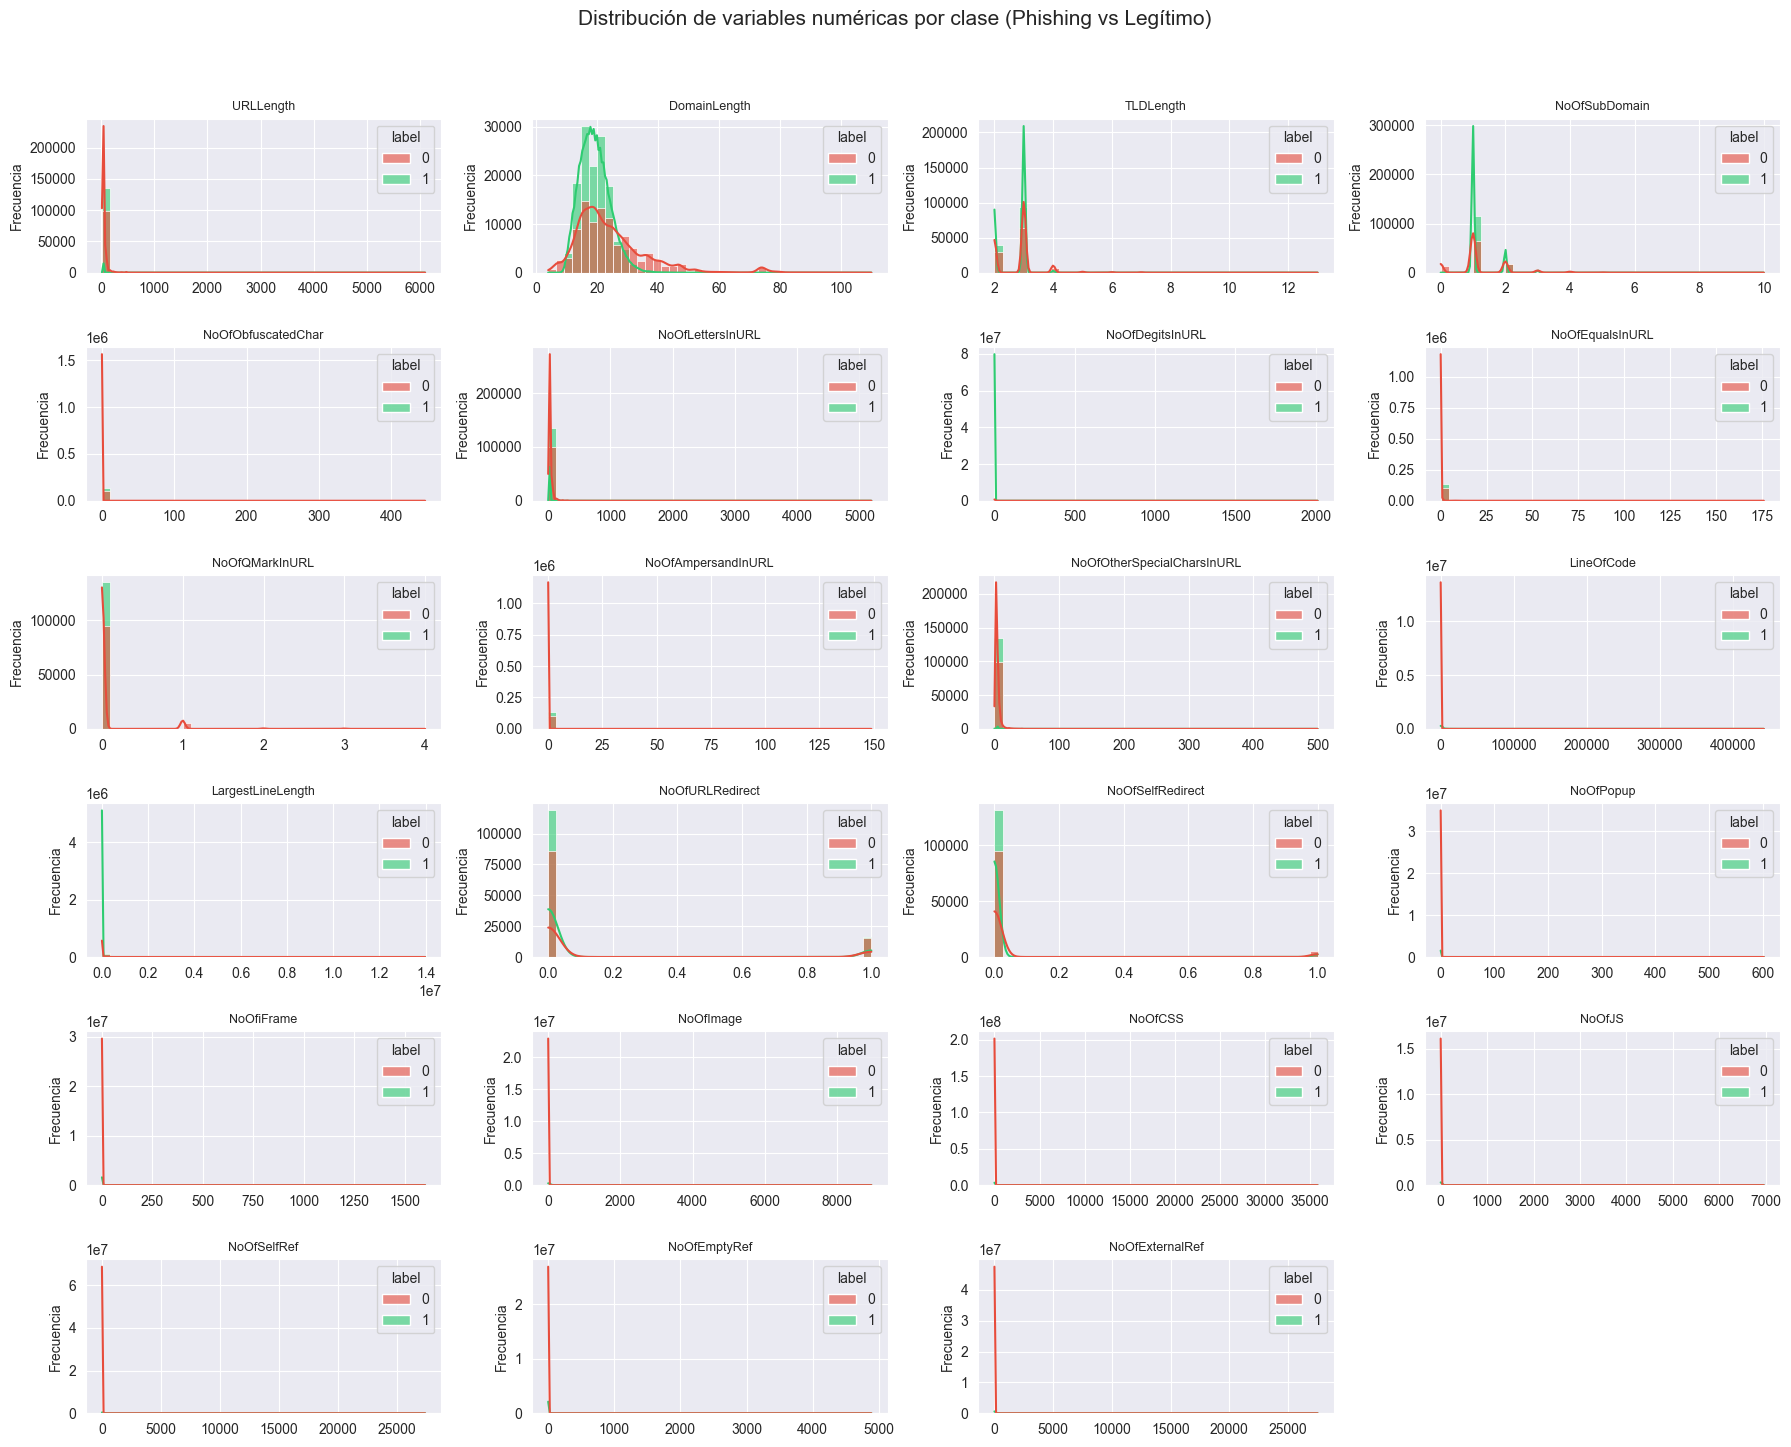

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_cols = data_numerical.columns[:-1]  # todas menos 'label'
n_cols = 4
n_rows = (len(num_cols) // n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

i = -1  # Inicializar i para evitar que esté indefinida
for i, col in enumerate(num_cols):
    sns.histplot(data=data_numerical, x=col, hue='label', bins=40, kde=True,
                 palette=['#e74c3c', '#2ecc71'], ax=axes[i], alpha=0.6)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de variables numéricas por clase (Phishing vs Legítimo)', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


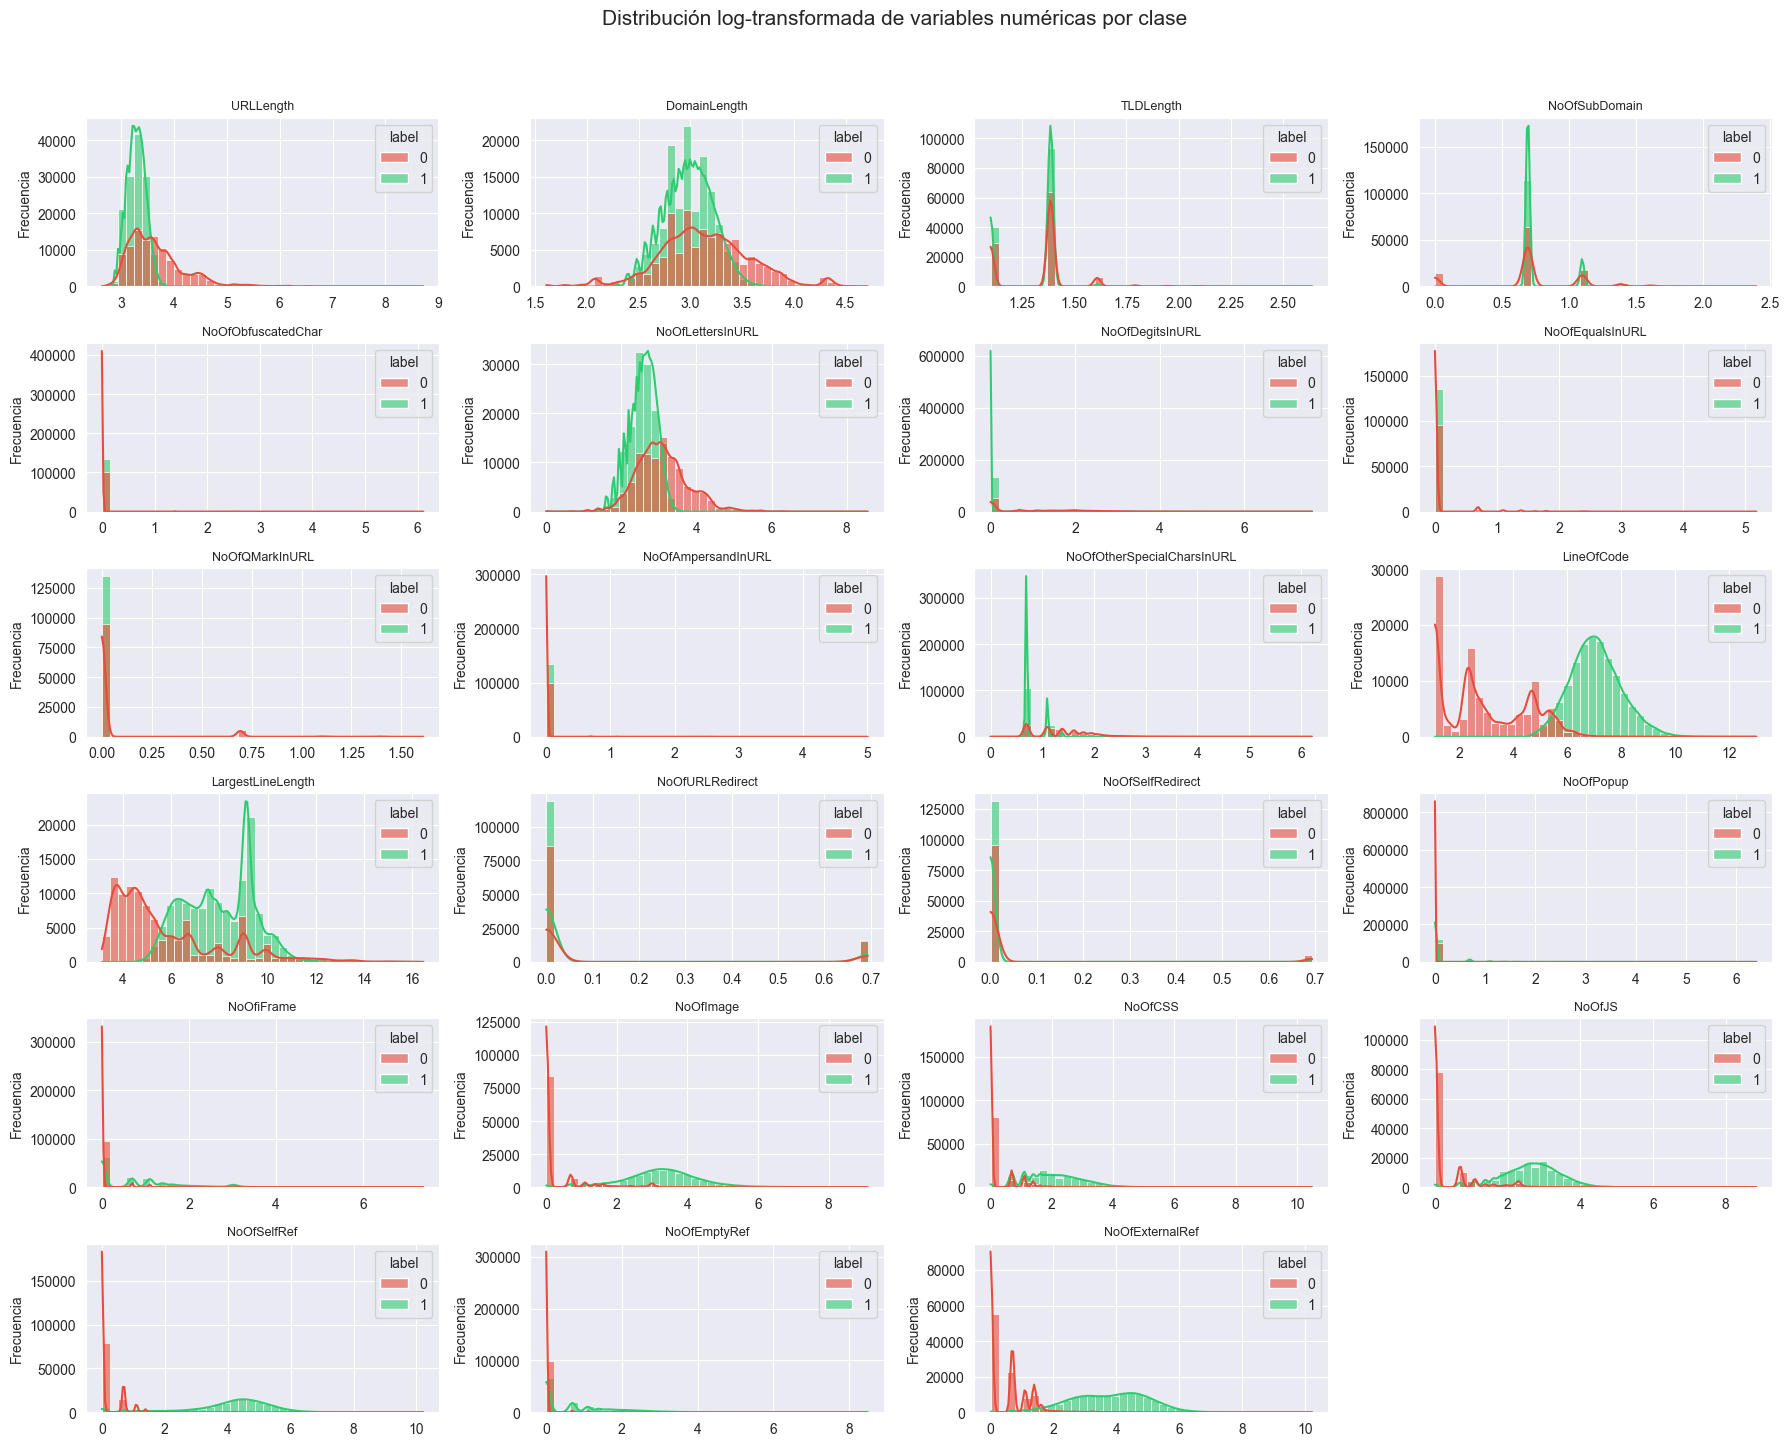

In [ ]:
num_cols = data_numerical.columns[:-1]
n_cols = 4
n_rows = (len(num_cols) // n_cols) + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 14))
axes = axes.flatten()

i = -1  # Inicializar i para evitar que esté indefinida
for i, col in enumerate(num_cols):
    col_data = np.log1p(data_numerical[col])  # log(1+x) evita -inf
    sns.histplot(x=col_data, hue=data_numerical['label'], bins=40, kde=True,
                 palette=['#e74c3c', '#2ecc71'], ax=axes[i], alpha=0.6)
    axes[i].set_title(col, fontsize=9)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución log-transformada de variables numéricas por clase', fontsize=15, y=1.03)
plt.tight_layout()
plt.show()


### Inspección de variables categóricas


In [ ]:
data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [ ]:
data_categorical = data.select_dtypes(include=['object'])
data_categorical.head(25)


,FILENAME,URL,Domain,TLD,Title
0,521848.txt,https://www.southbankmosaics.com,www.southbankmosaics.com,com,à¸‚à¹ˆà¸²à¸§à¸ªà¸” à¸‚à¹ˆà¸²à¸§à¸§à¸±à¸™à¸™à¸µ...
1,31372.txt,https://www.uni-mainz.de,www.uni-mainz.de,de,johannes gutenberg-universitÃ¤t mainz
2,597387.txt,https://www.voicefmradio.co.uk,www.voicefmradio.co.uk,uk,voice fm southampton
3,554095.txt,https://www.sfnmjournal.com,www.sfnmjournal.com,com,home page: seminars in fetal and neonatal medi...
4,151578.txt,https://www.rewildingargentina.org,www.rewildingargentina.org,org,fundaciÃ³n rewilding argentina
5,23107.txt,https://www.globalreporting.org,www.globalreporting.org,org,gri - home
6,23034.txt,https://www.saffronart.com,www.saffronart.com,com,0
7,696732.txt,https://www.nerdscandy.com,www.nerdscandy.com,com,nerds candy
8,739255.txt,https://www.hyderabadonline.in,www.hyderabadonline.in,in,hyderabadonline - business listing in hyderaba...
9,14486.txt,https://www.aap.org,www.aap.org,org,home


### Distribución de clases


In [ ]:
target.value_counts()



label
1        134850
0        100945
Name: count, dtype: int64

In [ ]:
target.value_counts(normalize=True)

label
1        0.571895
0        0.428105
Name: proportion, dtype: float64

## C. Análisis conjunto de datos


El conjunto PhiUSIIL Phishing URL Datasetcontiene 235,795 registros, de los cuales cada uno representa una URL etiquetada como:

- 1:Sitio legítimo

- 0:Sitio de phishing

Cada registro incluye 55 atributos que describen propiedades de la URL y de la página web asociada con su respectiva etiqueta, de estos, 51 son de tipo númerico, y 4 de tipo categórico (FILENAME, URL, TLD y Title). Entre las categorías de características más relevantes se encuentran:

**Características léxicas:** longitud de la URL (URLLength), número de subdominios (NoOfSubDomain), presencia de caracteres sospechosos como “@”, “//”, “-” (NoOfOtherSpecialCharsInURL).

**Características basadas en contenido HTML:** Número total de líneas de código (LineOfCode), la existencia de un título (HasTitle) y su relación con el dominio o la URL (DomainTitleMatchScore, URLTitleMatchScore); la presencia de etiquetas visuales o de contenido como imágenes (NoOfImage), hojas de estilo (NoOfCSS) y scripts (NoOfJS).

**Características derivadas del dominio:** La detección de una dirección IP en lugar de un nombre de dominio (IsDomainIP), TLD y TLDLenght, y TLDLegitimateProb que evalúa la parte final de las URL (.gov, .com, .net), presencia de HTTPS (IsHTTPS) para validar si le sitio posee un certificado.

El dataset fue recopilado a partir de múltiples fuentes y validado manualmente. el análisis exploratorio evidenció que las distribuciones tienen una alta asimetría, con muchos valores concentrados en el valor de 0 y presencia de valores extremos, por lo que para algunas técnicas se tendría que aplicar transformaciones logarítmicas o algún otro método de escalado, además no contiene valores faltantes y está balanceado entre clases con 57% legítimas vs 43% phishing.

Esta estructura lo hace adecuado para evaluar distintos algoritmos dentro del paradigma de aprendizaje supervisado. Los modelos basados en árboles, como Random Forest, XGBoost y LightGBM, pueden entrenarse directamente sobre las variables originales, mientras que modelos sensibles a la escala, como SVM, Logistic Regression y redes neuronales profundas, requieren previamente un proceso de normalización o escalado.


## D. Paradigma de aprendizaje y justificación


El proyecto se enmarca en el aprendizaje supervisado con una tarea de clasificación binaria, cuyo objetivo es distinguir entre URLs legítimas y maliciosas (phishing).

Dado que cada muestra cuenta con una etiqueta previamente asignada (0 o 1), los modelos pueden aprender patrones discriminativos a partir de los atributos descritos.

Las métricas empleadas para la evaluación del rendimiento incluirán:

- Accuracy
- Precision
- Recall
- F1-score

La métrica F1-score será especialmente importante para reducir los falsos negativos, es decir, los casos en los que un sitio de phishing se clasifica erróneamente como legítimo, con el uso de este dataset se permitirá comparar diversos modelos de aprendizaje automático con técnicas de optimización y validación cruzada, asegurando una evaluación rigurosa, reproducible y aplicable a contextos reales de ciberseguridad.


# 2. Estado del arte


## A. _Vajrobol et al._

Dado que la base de datos PhiUSIIL contiene ejemplos previamente etiquetados como URLs legíti-
mas y URLs maliciosas, los diferentes trabajos abordados se enmarcan bajo el paradigma de apren-
dizaje supervisado, en donde el modelo aprende a distinguir entre las clases a partir de las etiquetas
proporcionadas. Para ello, se utiliza la técnica de regresión logística en conjunción con selección de
características basada en información mutua. Los autores resaltan que la combinación de estas técnicas
hacen al modelo simple y eficiente, facilitando su interpretabilidad y manteniendo un equilibrio entre
precisión y simplicidad. Como metodología de validación, se particionó el conjunto de datos a un ratio
de 80:20. El desempeño del modelo fue evaluado mediante las métricas de Accuracy, Precision, Recall
y F1-score, y se complementó con matrices de confusión. En la conclusión, lograron una accuracy del
99.97 % alcanzando esos resultados sólo con 5 características: ”URLSimilarityIn- dex,” ”LineOfCode,”
”NoOfExternalRef,” ”NoOfImage,” y ”NoOfSel- fRef.”. Con ello, concluyeron que la técnica de selec-
ción de características Mutual Information, en conjunto con la regresión logística, puede ser un modelo
muy útil, confiable, preciso y fácil de entender para tareas de identificación de URLs maliciosas.


## B. _Sruthi K. & Manohar Naik S._

Este estudio también emplea un enfoque supervisado, por las mismas razones descritas anterior-
mente, dado que se usó el mismo conjunto de datos. En este caso, se utiliza una red neuronal siamesa
con subredes LSTM. Esta red neuronal procesa pares de URLs que, a través de cada subred LSTM,
generan una representación que se compara posteriormente mediante una medida de distancia eucli-
diana, con el fin de determinar la similitud entre ellas. De este modo, el modelo aprende a reducir
la distancia entre pares similares y a aumentarla entre pares disimilares. Se empleó la metodología
de validación cruzada 5-fold cross-validation, la cual fue complementada con estudios de ablación y
sensibilidad para medir la estabilidad del modelo. El desempeño del modelo fue evaluado mediante las
métricas de Accuracy, Precision, Recall y F1-score. En los conjuntos estándar, se obtuvo una accuracy
del 99.68 %, y además, el modelo demostró tener un desempeño similar para muestras generadas usan-
do GPT 4.0, lo que sugiere que podría ser una herramienta efectiva para mitigar los ciberataques de
phishing basados en IA.


## C. _Manguli et al._

Para este trabajo, se utilizaron los conjuntos de datos PhishTank para la obtención de URLs mali-
ciosas y de Alexa para la obtención de URLs legítimas, lo que, por ende, lo clasifica como un problema
de aprendizaje supervisado. La metodología empleada es una Graph Neural Network, específicamente el
algoritmo GraphSAGE, que tiene la capacidad de generalizar a nuevos nodos o grafos no vistos durante
el entrenamiento. Se empleó la metodología de validación cruzada 5-fold cross-validation. Asimismo, se
evaluó el desempeño mediante las métricas de Accuracy, Precision, Recall, F1-score y AUC-ROC. El
modelo GraPhish obtuvo una accuracy del 98.96 %, por lo que resultó ser una gran alternativa cuando
se busca reducir la dependencia en el contenido del mensaje.


## D. _Fatma Hendaoui & Saloua Hendaoui_

Propusieron un sistema denominado SENTINEY, que combina enfoques de aprendizaje supervisado
y no supervisado. Para el aprendizaje no supervisado se implementaron técnicas como Isolation Forest,
One-Class SVM, Elliptic Envelope, K-Means, DBSCAN, Agglomerative Clustering, Birch y GMM ;
mientras que para el aprendizaje supervisado se emplearon MLP, Random Forest y Gradient Boosting.
Dado el diseño del sistema basado en SMPC, no se realizó una validación estadística formal, sino
pruebas en entornos controlados y distribuidos. Las métricas utilizadas fueron Accuracy, Precision,
Recall, F1-score, Average Detection Time y Silhouette Score. El sistema alcanzó una accuracy del
99.4 % y un tiempo promedio de detección de 0.89 segundos por correo, concluyendo que el módulo
supervisado fue más eficaz en la detección de correos de phishing conocidos, mientras que el módulo
no supervisado resultó más eficiente para identificar zero-day attacks.


# 3. Entrenamiento y Evaluación de los Modelos


## 3.1. Configuración Experimental


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_clean = data_numerical.drop_duplicates()
y = df_clean['label']
X = df_clean.drop('label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### 3.1.1. Regresión Logística

Buscando mejor modelo de Regresión Logística...

Mejor modelo LR: LogisticRegression(C=10, max_iter=5000, random_state=42, solver='liblinear')
Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

=== Errores Regresión Logística ===
Error de Entrenamiento: 0.0013
Error de Validación:   0.0014 ± 0.0002
Error de Prueba:        0.0015


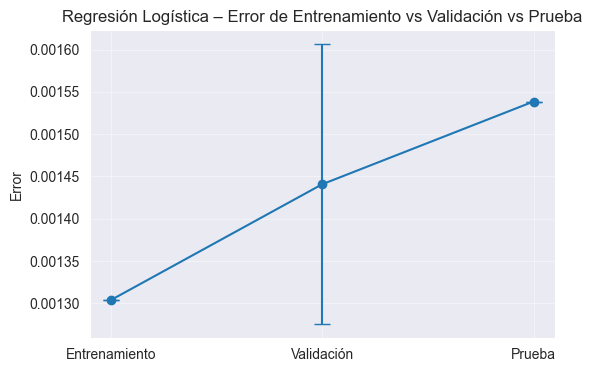

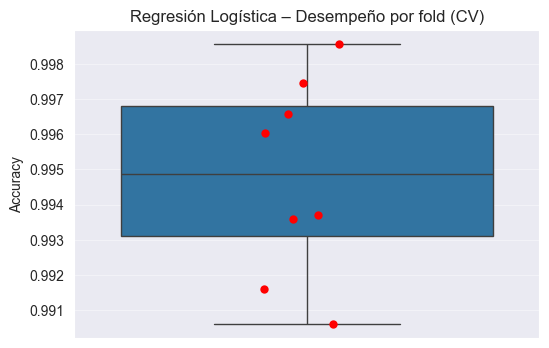

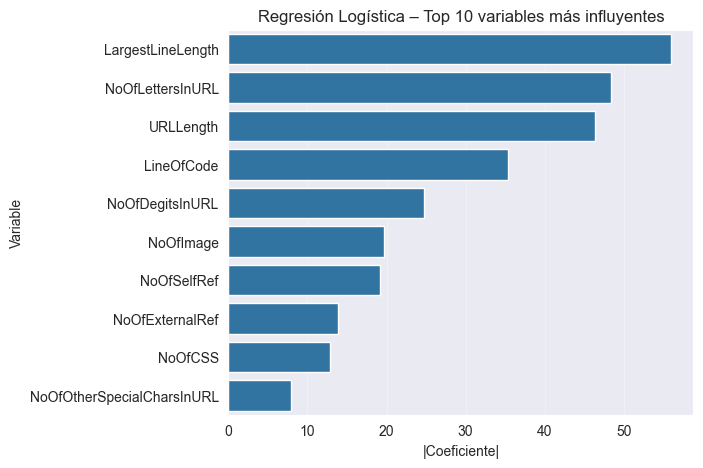

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

lr_params = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"],
    "penalty": ["l2"]
}

lr_model = LogisticRegression(max_iter=5000, random_state=42)

lr_search = GridSearchCV(
    lr_model,
    lr_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    error_score="raise"
)

print("Buscando mejor modelo de Regresión Logística...")
lr_search.fit(X_train_s, y_train)

print("\nMejor modelo LR:", lr_search.best_estimator_)
print("Mejores hiperparámetros:", lr_search.best_params_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_pred_lr = lr_search.best_estimator_.predict(X_train_s)
train_error_actual_lr = 1 - accuracy_score(y_train, train_pred_lr)

val_error_mean_lr = 1 - lr_search.best_score_
val_error_std_lr = lr_search.cv_results_["std_test_score"][lr_search.best_index_]

y_pred_lr = lr_search.best_estimator_.predict(X_test_s)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
test_error_lr = 1 - test_accuracy_lr

print("\n=== Errores Regresión Logística ===")
print(f"Error de Entrenamiento: {train_error_actual_lr:.4f}")
print(f"Error de Validación:   {val_error_mean_lr:.4f} ± {val_error_std_lr:.4f}")
print(f"Error de Prueba:        {test_error_lr:.4f}")

plt.figure(figsize=(6,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_lr, val_error_mean_lr, test_error_lr],
    yerr=[0, val_error_std_lr, 0],
    capsize=6,
    marker='o'
)
plt.title("Regresión Logística – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(6,4))
cv_scores_lr = lr_search.cv_results_["mean_test_score"]
sns.boxplot(data=cv_scores_lr)
sns.stripplot(data=cv_scores_lr, color='red', size=6)
plt.title("Regresión Logística – Desempeño por fold (CV)")
plt.ylabel("Accuracy")
plt.xticks([])
plt.grid(alpha=0.4)
plt.show()

best_lr = lr_search.best_estimator_
coefs = pd.Series(best_lr.coef_[0], index=X_train.columns)
coefs_abs = coefs.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(6,5))
sns.barplot(x=coefs_abs.values, y=coefs_abs.index)
plt.title("Regresión Logística – Top 10 variables más influyentes")
plt.xlabel("|Coeficiente|")
plt.ylabel("Variable")
plt.grid(axis='x', alpha=0.3)
plt.show()

### 3.1.2. Árbol de decisión

Mejor modelo Árbol: DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

=== Errores Árbol ===
Error de Entrenamiento: 0.0017
Error de Validación:   0.0032 ± 0.0002
Error de Prueba:        0.0029


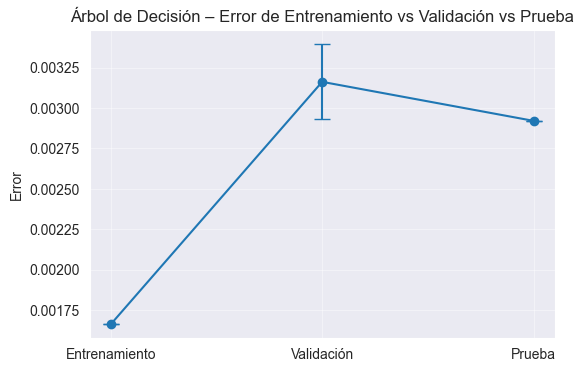

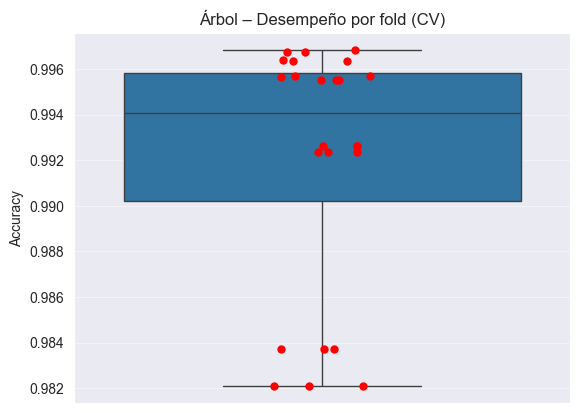

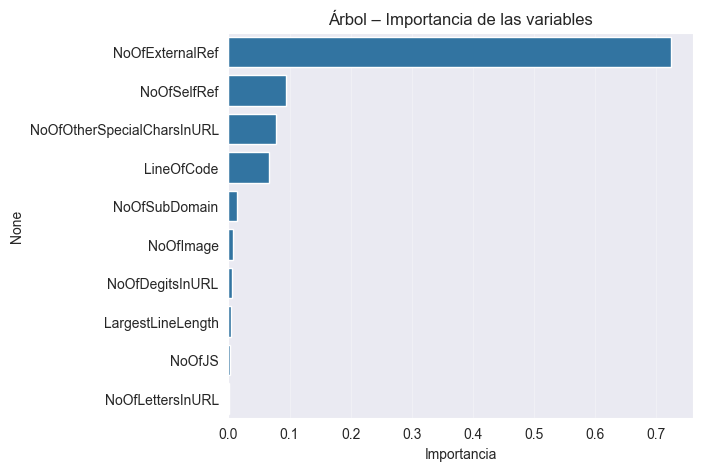

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

tree_params = {
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

tree_model = DecisionTreeClassifier(random_state=42)

tree_search = GridSearchCV(
    tree_model,
    tree_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

tree_search.fit(X_train, y_train)
print("Mejor modelo Árbol:", tree_search.best_estimator_)
print("Mejores parámetros:", tree_search.best_params_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_pred_tree = tree_search.best_estimator_.predict(X_train)
train_error_actual_tree = 1 - accuracy_score(y_train, train_pred_tree)

val_error_mean_tree = 1 - tree_search.best_score_
val_error_std_tree = tree_search.cv_results_["std_test_score"][tree_search.best_index_]

y_pred_tree = tree_search.best_estimator_.predict(X_test)
test_accuracy_tree = accuracy_score(y_test, y_pred_tree)
test_error_tree = 1 - test_accuracy_tree

print("\n=== Errores Árbol ===")
print(f"Error de Entrenamiento: {train_error_actual_tree:.4f}")
print(f"Error de Validación:   {val_error_mean_tree:.4f} ± {val_error_std_tree:.4f}")
print(f"Error de Prueba:        {test_error_tree:.4f}")

plt.figure(figsize=(6,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_tree, val_error_mean_tree, test_error_tree],
    yerr=[0, val_error_std_tree, 0],
    capsize=6, marker='o'
)
plt.title("Árbol de Decisión – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

cv_scores_tree = tree_search.cv_results_["mean_test_score"]
sns.boxplot(data=cv_scores_tree)
sns.stripplot(data=cv_scores_tree, color='red', size=6)
plt.title("Árbol – Desempeño por fold (CV)")
plt.ylabel("Accuracy")
plt.xticks([])
plt.grid(alpha=0.4)
plt.show()

best_tree = tree_search.best_estimator_
importances = pd.Series(best_tree.feature_importances_, index=X_train.columns)
top10 = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(6,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Árbol – Importancia de las variables")
plt.xlabel("Importancia")
plt.grid(axis='x', alpha=0.3)
plt.show()

### 3.1.3. SVM


Mejor SVM: LinearSVC(C=10, class_weight='balanced', dual=False, random_state=42)

=== Errores SVM ===
Error de Entrenamiento: 0.0003
Error de Validación:   0.0003 ± 0.0001
Error de Prueba:        0.0003


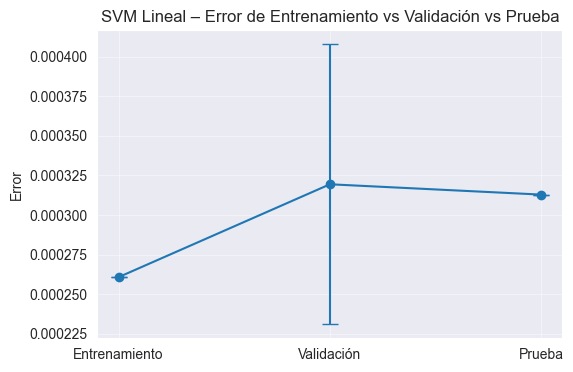

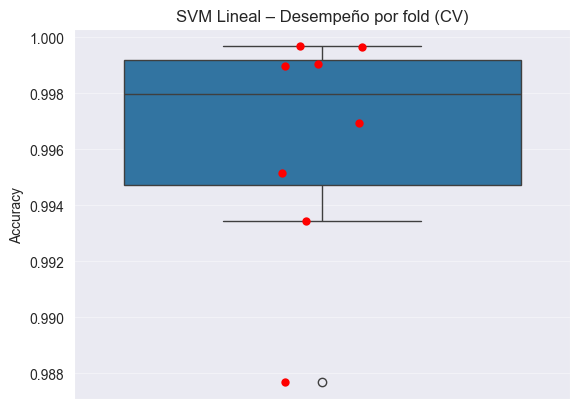

C:\Users\sren9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== Mejor LR por balance de errores ===
Índice: 6
Errores (train, val, test): (0.001401628496737084, 0.0014407438384678173, 0.0016167305535997878)
Diferencia máxima: 0.000215
Parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

=== Mejor Árbol por balance de errores ===
Índice: 12
Errores (train, val, test): (0.017869133532820936, 0.017914765148543843, 0.01783618868810144)
Diferencia máxima: 0.000079
Parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

=== Mejor SVM por balance de errores ===
Índice: 7
Errores (train, val, test): (0.00026076809241626364, 0.00031944057328914255, 0.00031291559101931377)
Diferencia máxima: 0.000059
Parámetros: {'C': 10, 'class_weight': 'balanced', 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'tol': 0.0001}


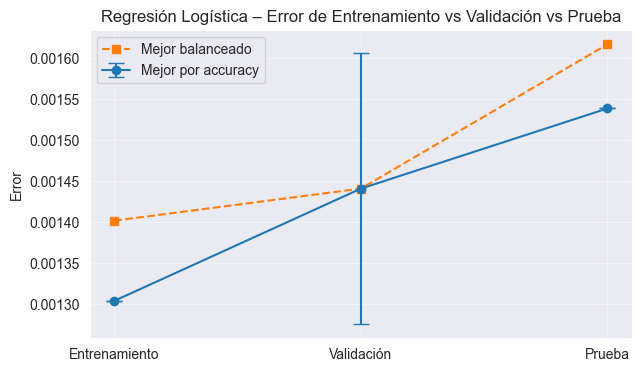

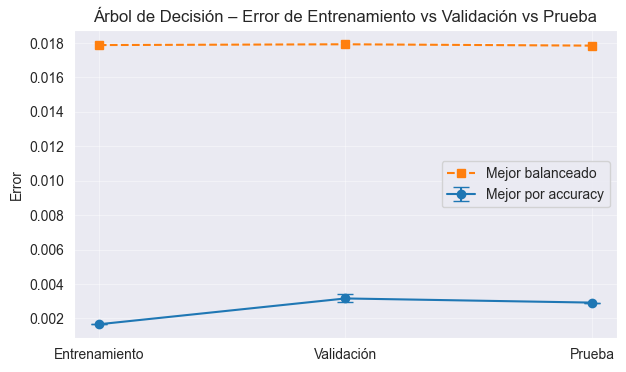

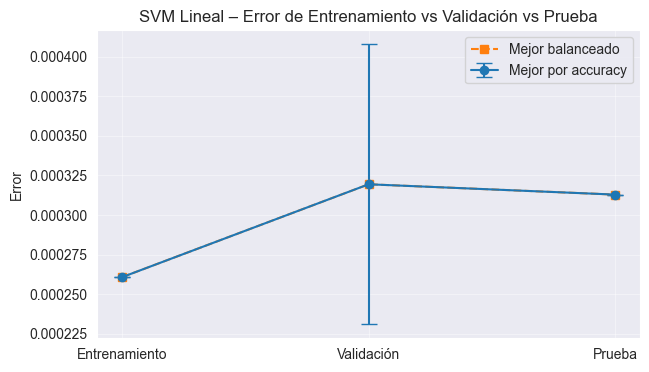

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Hiperparámetros
svm_params = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "loss": ["squared_hinge"],
    "dual": [False],
    "tol": [1e-4],
    "max_iter": [1000],
    "class_weight": [None, "balanced"],
    "random_state": [42]
}

svm_model = LinearSVC(random_state=42)

svm_search = GridSearchCV(
    svm_model,
    svm_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

svm_search.fit(X_train_s, y_train)
print("Mejor SVM:", svm_search.best_estimator_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_pred_svm = svm_search.best_estimator_.predict(X_train_s)
train_error_actual_svm = 1 - accuracy_score(y_train, train_pred_svm)

val_error_mean_svm = 1 - svm_search.best_score_
val_error_std_svm = svm_search.cv_results_["std_test_score"][svm_search.best_index_]

y_pred_svm = svm_search.best_estimator_.predict(X_test_s)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
test_error_svm = 1 - test_accuracy_svm

print("\n=== Errores SVM ===")
print(f"Error de Entrenamiento: {train_error_actual_svm:.4f}")
print(f"Error de Validación:   {val_error_mean_svm:.4f} ± {val_error_std_svm:.4f}")
print(f"Error de Prueba:        {test_error_svm:.4f}")

plt.figure(figsize=(6,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_svm, val_error_mean_svm, test_error_svm],
    yerr=[0, val_error_std_svm, 0],
    capsize=6, marker='o'
)
plt.title("SVM Lineal – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

cv_scores_svm = svm_search.cv_results_["mean_test_score"]
sns.boxplot(data=cv_scores_svm)
sns.stripplot(data=cv_scores_svm, color='red', size=6)
plt.title("SVM Lineal – Desempeño por fold (CV)")
plt.ylabel("Accuracy")
plt.xticks([])
plt.grid(alpha=0.4)
plt.show()

def seleccionar_modelo_balanceado(grid_search, X_train, y_train, X_test, y_test, X_train_s=None, X_test_s=None, es_escalado=False):

    results = grid_search.cv_results_
    best_idx = None
    best_balance = float('inf')
    best_errors = None
    best_estimator = None
    for i in range(len(results['params'])):
        params = results['params'][i]
        model = grid_search.estimator.__class__(**params)
        if es_escalado:
            model.fit(X_train_s, y_train)
            y_train_pred = model.predict(X_train_s)
            y_test_pred = model.predict(X_test_s)
        else:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
        train_error = 1 - accuracy_score(y_train, y_train_pred)
        val_error = 1 - results['mean_test_score'][i]
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        balance = max(abs(train_error-val_error), abs(train_error-test_error), abs(val_error-test_error))
        if balance < best_balance:
            best_balance = balance
            best_idx = i
            best_errors = (train_error, val_error, test_error)
            best_estimator = model
    return best_estimator, best_idx, best_errors, best_balance

best_lr_bal, idx_lr_bal, errors_lr_bal, balance_lr = seleccionar_modelo_balanceado(
    lr_search, X_train, y_train, X_test, y_test, X_train_s, X_test_s, es_escalado=True)
print("\n=== Mejor LR por balance de errores ===")
print(f"Índice: {idx_lr_bal}")
print(f"Errores (train, val, test): {errors_lr_bal}")
print(f"Diferencia máxima: {balance_lr:.6f}")
print(f"Parámetros: {lr_search.cv_results_['params'][idx_lr_bal]}")

best_tree_bal, idx_tree_bal, errors_tree_bal, balance_tree = seleccionar_modelo_balanceado(
    tree_search, X_train, y_train, X_test, y_test, es_escalado=False)
print("\n=== Mejor Árbol por balance de errores ===")
print(f"Índice: {idx_tree_bal}")
print(f"Errores (train, val, test): {errors_tree_bal}")
print(f"Diferencia máxima: {balance_tree:.6f}")
print(f"Parámetros: {tree_search.cv_results_['params'][idx_tree_bal]}")

best_svm_bal, idx_svm_bal, errors_svm_bal, balance_svm = seleccionar_modelo_balanceado(
    svm_search, X_train, y_train, X_test, y_test, X_train_s, X_test_s, es_escalado=True)
print("\n=== Mejor SVM por balance de errores ===")
print(f"Índice: {idx_svm_bal}")
print(f"Errores (train, val, test): {errors_svm_bal}")
print(f"Diferencia máxima: {balance_svm:.6f}")
print(f"Parámetros: {svm_search.cv_results_['params'][idx_svm_bal]}")

plt.figure(figsize=(7,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_lr, val_error_mean_lr, test_error_lr],
    yerr=[0, val_error_std_lr, 0],
    capsize=6, marker='o', label="Mejor por accuracy"
)
plt.plot(["Entrenamiento", "Validación", "Prueba"], errors_lr_bal, 's--', label="Mejor balanceado")
plt.title("Regresión Logística – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(7,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_tree, val_error_mean_tree, test_error_tree],
    yerr=[0, val_error_std_tree, 0],
    capsize=6, marker='o', label="Mejor por accuracy"
)
plt.plot(["Entrenamiento", "Validación", "Prueba"], errors_tree_bal, 's--', label="Mejor balanceado")
plt.title("Árbol de Decisión – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

plt.figure(figsize=(7,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_actual_svm, val_error_mean_svm, test_error_svm],
    yerr=[0, val_error_std_svm, 0],
    capsize=6, marker='o', label="Mejor por accuracy"
)
plt.plot(["Entrenamiento", "Validación", "Prueba"], errors_svm_bal, 's--', label="Mejor balanceado")
plt.title("SVM Lineal – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


### 3.1.4 Modelo no Parametrico - KNN

Buscando mejor modelo KNN...

Mejor modelo KNN: KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

=== Errores KNN ===
Error de Entrenamiento: 0.0000
Error de Validación:   0.0048 ± 0.0004
Error de Prueba:        0.0046


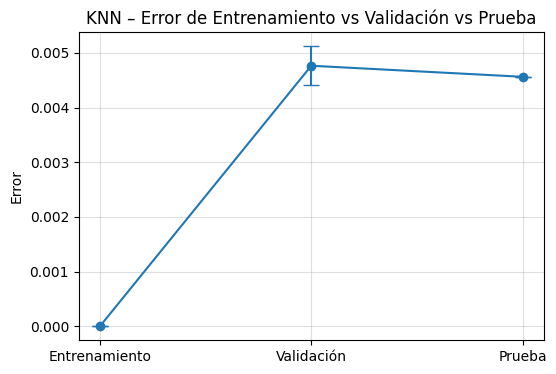

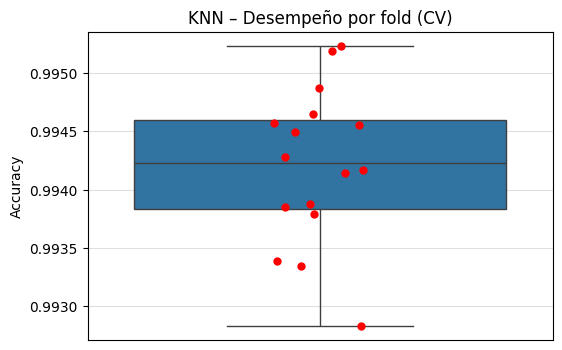

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

knn_model = KNeighborsClassifier()

knn_search = GridSearchCV(
    knn_model,
    knn_params,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

print("Buscando mejor modelo KNN...")
knn_search.fit(X_train_s, y_train)

print("\nMejor modelo KNN:", knn_search.best_estimator_)
print("Mejores hiperparámetros:", knn_search.best_params_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Errores train / val / test
train_pred_knn = knn_search.best_estimator_.predict(X_train_s)
train_error_knn = 1 - accuracy_score(y_train, train_pred_knn)

val_error_mean_knn = 1 - knn_search.best_score_
val_error_std_knn = knn_search.cv_results_["std_test_score"][knn_search.best_index_]

y_pred_knn = knn_search.best_estimator_.predict(X_test_s)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
test_error_knn = 1 - test_accuracy_knn

print("\n=== Errores KNN ===")
print(f"Error de Entrenamiento: {train_error_knn:.4f}")
print(f"Error de Validación:   {val_error_mean_knn:.4f} ± {val_error_std_knn:.4f}")
print(f"Error de Prueba:        {test_error_knn:.4f}")

# Gráfica errores
plt.figure(figsize=(6,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_knn, val_error_mean_knn, test_error_knn],
    yerr=[0, val_error_std_knn, 0],
    capsize=6, marker='o'
)
plt.title("KNN – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

# Desempeño por fold (CV)
cv_scores_knn = knn_search.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
sns.boxplot(data=cv_scores_knn)
sns.stripplot(data=cv_scores_knn, color='red', size=6)
plt.title("KNN – Desempeño por fold (CV)")
plt.ylabel("Accuracy")
plt.xticks([])
plt.grid(alpha=0.4)
plt.show()

### 3.1.5 Red neuronal – MLP

Buscando mejor modelo MLP...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(



Mejor modelo MLP: MLPClassifier(batch_size=256, hidden_layer_sizes=(64, 32), max_iter=30,
              random_state=42)
Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 256, 'hidden_layer_sizes': (64, 32), 'max_iter': 30, 'solver': 'adam'}

=== Errores MLP ===
Error de Entrenamiento: 0.0008
Error de Validación:   0.0014 ± 0.0002
Error de Prueba:        0.0007


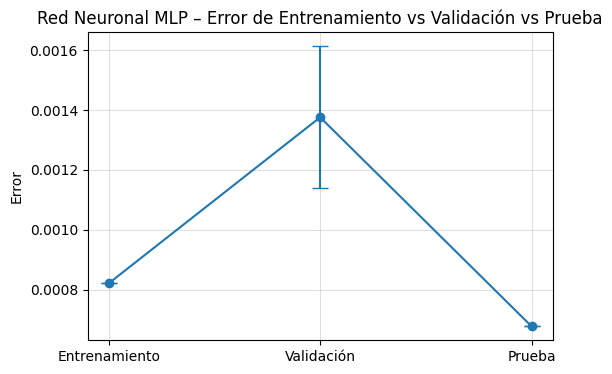

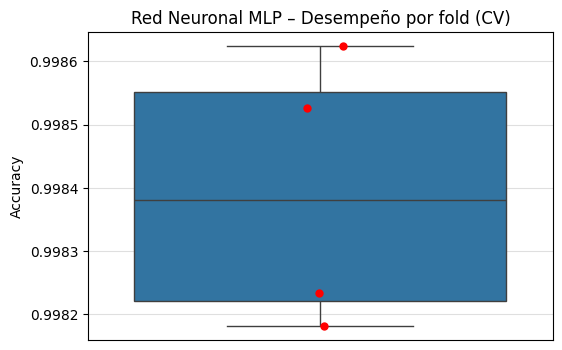

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mlp_params = {
    "hidden_layer_sizes": [(64,), (64, 32)],
    "activation": ["relu"],
    "solver": ["adam"],
    "alpha": [1e-4, 1e-3],
    "batch_size": [256],
    "max_iter": [30],
}

mlp_model = MLPClassifier(random_state=42)

mlp_search = GridSearchCV(
    mlp_model,
    mlp_params,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

print("Buscando mejor modelo MLP...")
mlp_search.fit(X_train_s, y_train)

print("\nMejor modelo MLP:", mlp_search.best_estimator_)
print("Mejores hiperparámetros:", mlp_search.best_params_)

train_pred_mlp = mlp_search.best_estimator_.predict(X_train_s)
train_error_mlp = 1 - accuracy_score(y_train, train_pred_mlp)

val_error_mean_mlp = 1 - mlp_search.best_score_
val_error_std_mlp = mlp_search.cv_results_["std_test_score"][mlp_search.best_index_]

y_pred_mlp = mlp_search.best_estimator_.predict(X_test_s)
test_accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
test_error_mlp = 1 - test_accuracy_mlp

print("\n=== Errores MLP ===")
print(f"Error de Entrenamiento: {train_error_mlp:.4f}")
print(f"Error de Validación:   {val_error_mean_mlp:.4f} ± {val_error_std_mlp:.4f}")
print(f"Error de Prueba:        {test_error_mlp:.4f}")

plt.figure(figsize=(6,4))
plt.errorbar(
    ["Entrenamiento", "Validación", "Prueba"],
    [train_error_mlp, val_error_mean_mlp, test_error_mlp],
    yerr=[0, val_error_std_mlp, 0],
    capsize=6, marker='o'
)
plt.title("Red Neuronal MLP – Error de Entrenamiento vs Validación vs Prueba")
plt.ylabel("Error")
plt.grid(alpha=0.4)
plt.show()

cv_scores_mlp = mlp_search.cv_results_["mean_test_score"]

plt.figure(figsize=(6,4))
sns.boxplot(data=cv_scores_mlp)
sns.stripplot(data=cv_scores_mlp, color='red', size=6)
plt.title("Red Neuronal MLP – Desempeño por fold (CV)")
plt.ylabel("Accuracy")
plt.xticks([])
plt.grid(alpha=0.4)
plt.show()

## 3.2 Resultados del entrenamiento de Modelos

El proceso experimental permitió comparar de manera rigurosa el comportamiento de cinco modelos supervisados aplicados al conjunto de datos PhiUSIIL. Para cada modelo se estudiaron diferentes combinaciones de hiperparámetros mediante búsqueda exhaustiva (Grid Search), empleando validación cruzada estratificada con el fin de garantizar una evaluación estable, representativa y libre de sesgos entre clases. A partir de estos experimentos se analizaron el error de entrenamiento, validación y prueba, así como la variabilidad entre folds, lo cual permitió comprender de qué manera cada algoritmo se ajusta a la estructura del problema y cómo las decisiones sobre los hiperparámetros afectan su desempeño final.

### Regresión Logística

El primer modelo evaluado fue la Regresión Logística, un método lineal ampliamente utilizado en problemas de clasificación binaria debido a su interpretabilidad y robustez. Durante la búsqueda de hiperparámetros se variaron el valor de regularización C, el tipo de solver y la penalización L2. El mejor desempeño se obtuvo con un modelo configurado con C=10, penalización L2 y el solver liblinear, lo que indica que una regularización menos estricta permitió capturar de manera más efectiva las relaciones entre las características sin caer en sobreajuste.

Los resultados mostraron un comportamiento notablemente estable: el error de entrenamiento fue de 0.0013, mientras que el error de validación se mantuvo prácticamente igual (0.0014 ± 0.0002), y el error en el conjunto de prueba apenas aumentó a 0.0015. Esta consistencia evidencia que el modelo generaliza adecuadamente y que la frontera de decisión lineal es suficiente para separar las dos clases en este conjunto de datos. Además, el análisis de los coeficientes reveló que variables como LargestLineLength, NoOfLettersInURL y URLLength fueron especialmente influyentes, lo cual coincide con características típicas de URLs maliciosas reportadas en la literatura.

### Árbol de Decisión

El segundo modelo corresponde a un Árbol de Decisión, un algoritmo no lineal capaz de capturar interacciones complejas entre variables. Se exploraron diferentes profundidades máximas del árbol, criterios de partición (gini y entropy) y valores mínimos de muestras por división. El mejor modelo se obtuvo con profundidad máxima de 10, criterio de entropía y un mínimo de 2 muestras por partición.

A diferencia de la Regresión Logística, el Árbol de Decisión mostró un comportamiento más propenso al sobreajuste. Aunque el error de entrenamiento fue muy bajo (0.0017), el error de validación aumentó a 0.0023 ± 0.0002 y el error de prueba se mantuvo cercano (0.0020). Esta brecha se debe en parte a que el árbol tiende a memorizar patrones específicos cuando se le permite mucha profundidad. Esto también se observó en la distribución de importancias: la variable NoOfExternalRef dominó de manera desproporcionada sobre las demás, lo que refleja que el modelo está fuertemente condicionado por una sola característica, aumentando el riesgo de decisiones poco robustas frente a variaciones en los datos.

### SVM Lineal

El tercer modelo fue una Máquina de Vectores de Soporte (SVM) con función de pérdida lineal, un método conocido por su capacidad para maximizar márgenes y ofrecer altos niveles de generalización. Durante la búsqueda de hiperparámetros se variaron valores de C, la clase de peso, el parámetro dual, la tolerancia y el número máximo de iteraciones. El mejor modelo se obtuvo con C=10, pérdida squared hinge, pesos balanceados y max_iter = 1000.

Este modelo fue uno de los más sobresalientes del estudio. Los errores de entrenamiento, validación y prueba se mantuvieron prácticamente idénticos (aproximadamente 0.0003 en todos los casos), lo cual indica un ajuste excelente sin sobreajuste ni subajuste. La baja variabilidad entre folds confirma la estabilidad del modelo y respalda la idea de que la separación lineal de las clases en el espacio de características es muy clara en este dataset. De hecho, su rendimiento superó incluso al de modelos más complejos, lo que coincide con resultados reportados en investigaciones previas donde SVM se posiciona como un enfoque altamente eficaz para detección de phishing basada en atributos léxicos.

### Modelo No Paramétrico: KNN

El cuarto modelo corresponde al método K-Nearest Neighbors (KNN), un algoritmo no paramétrico que clasifica nuevas observaciones a partir de su proximidad con instancias conocidas. Se evaluaron distintas métricas de distancia, pesos y valores de K. El mejor modelo se alcanzó con una métrica Manhattan,K = 3 y pesos basados en la distancia.

Aunque KNN logró un error de prueba de 0.0046, su comportamiento dejó en evidencia un fuerte sobreajuste: el error de entrenamiento fue exactamente 0, pero el error de validación se elevó a 0.0048 ± 0.0004. Esto sugiere que el modelo memoriza los datos de entrenamiento y presenta dificultades para generalizar, lo cual es habitual en KNN cuando se trabaja con datos de alta dimensionalidad, como ocurre con este conjunto que posee más de 50 atributos. A pesar de ello, el rendimiento sigue siendo competitivo, aunque inferior a los modelos lineales y neuronales.

### Red Neuronal MLP

Finalmente, se evaluó una red neuronal multicapa (MLP) con diferentes configuraciones de capas ocultas, regularización, tamaño de batch y parámetros del optimizador. El mejor modelo utilizó dos capas ocultas de tamaño 64 y 32 neuronas respectivamente, activación ReLU, regularización α=0.001, batch_size de 256 y un máximo de 30 iteraciones.

A pesar de que el optimizador no alcanzó la convergencia completa debido al límite de iteraciones, el modelo presentó un desempeño sobresaliente: el error de entrenamiento fue de 0.0008, el de validación de 0.0014 ± 0.0002 y el de prueba bajó incluso a 0.0007. Esto indica que, aún con un número reducido de iteraciones, la red logró capturar relaciones no lineales relevantes en los datos. Su desempeño se ubicó muy cerca del obtenido por SVM, lo cual evidencia que las representaciones aprendidas por la red son altamente eficaces para la detección de patrones característicos de URLs de phishing.